<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Apprentice Chef | Regression Modeling</h2>
<br>Pimkarn Mekpruksawong<br>
Hult International Business School
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h2>Part I: Dataset Exploration</h2><br>
Import the neccessary packages and load the Apprentice Chef dataset

In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf                # predictive modeling with nice outputs
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model                          # linear models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing import StandardScaler     # standard scaler
import numpy as np


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>a) Overview of the dataset </h4><br>

In [2]:
# using .shape to print the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



There are 1946 observations and 28 features are present in the dataset.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Display the first 5 rows of each feature to get a feel for the data.</h4><br>

In [3]:
# displaying the first 5 rows of the DataFrame
chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Display general information about each variable, including types and the number of non-missing values.</h4>

In [4]:
# Information about each variable
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

It appears that the dataset contains a mix of data types; 3 variables of float, 21 variables of integer, and 4 variables of string. Also, the only one variable that contain missing values is Family Name.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) DESCRIBE each quantitative column using descriptive statistics to identifythe data type of each original variable in the dataset.</h4><br>

In [5]:
# descriptive statistics for numeric data
chef.describe(include = 'number').round(2)


,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


<h4>e) Identify data type of each original variable in the dataset.</h4><br>


<h2>Part II: Review of Missing Value Analysis and Imputation</h2><br>
<h4>a) Print number of missing values in the dataset.</h4>

In [6]:
# use method chaining to print sum missing values of each variable
chef.isnull().sum(axis = 0)


REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

As shown in the output, only FAMILY_NAME variable has missing values.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Flag missing values</h4>

In [7]:
# looping to detect features with missing values
for col in chef:

    # creating columns with 1s if missing and 0 if not
    if chef[col].isnull().astype(int).sum() > 0:
        chef['m_' + col] =chef[col].isnull().astype(int)

# summing the missing value flags to check the results of the loop above
chef[['m_FAMILY_NAME']].sum(axis = 0)


m_FAMILY_NAME    47
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Impute the missing values for FAMILY_NAME with 'Unknown'.</h4><br>
This is simply because family name is unique and my goal is to prevent any error caused by missing values.

In [8]:
# instantiating an imputation value
fill = 'Unknown'


# imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure missing values have been taken care of
chef.isnull().any(axis = 0).any(axis = 0)

False

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part III: Working with continuous variables</h2>

<h4>a) Develop a histogram to analyze the distribution of the Y-variable.</h4><br>

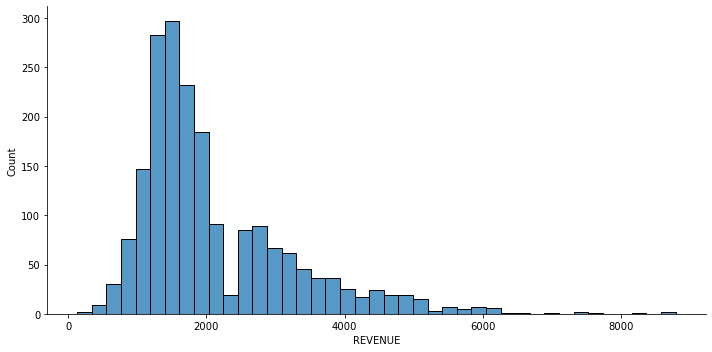

In [9]:
# developing a histogram using DISPLOT
sns.displot(data   = chef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)





# displaying the histogram
plt.show()

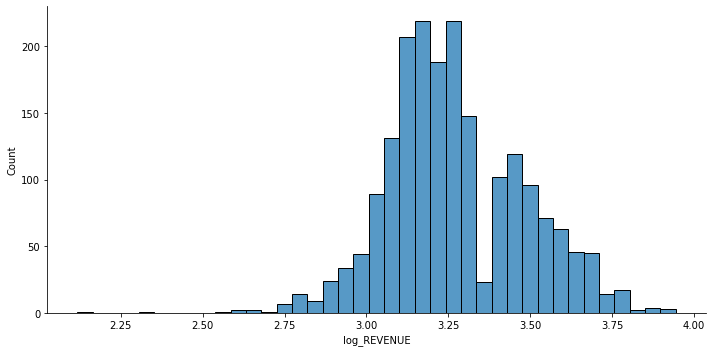

In [10]:
# log transforming REVENUE and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# developing a histogram using DISPLOT for REVENUE after log transformation
sns.displot(data   = chef,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

As can be observed from the distribution above, revenue is skewed positive.
<br><br>

After applying log transformation, revenue variable tends to become more normally distributed compared with the original data.

<h4>b) Develop a histogram to analyze the distribution of the X-variables.</h4><br>

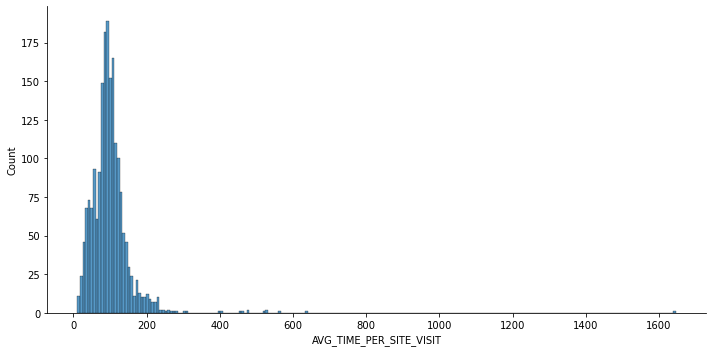

In [11]:
# developing a histogram using DISPLOT
# AVG_TIME_PER_SITE_VISIT
sns.displot(data   = chef,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

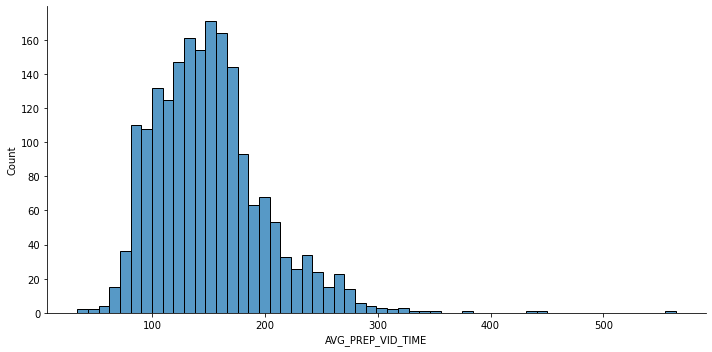

In [12]:
# developing a histogram using DISPLOT
# AVG_PREP_VID_TIME
sns.displot(data   = chef,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

As can be observed from the distribution above, AVG_TIME_PER_SITE_VISIT is skewed positive with outliers on the right side.

As can be observed from the distribution above, AVG_PREP_VID_TIME is skewed positive.<br><br>

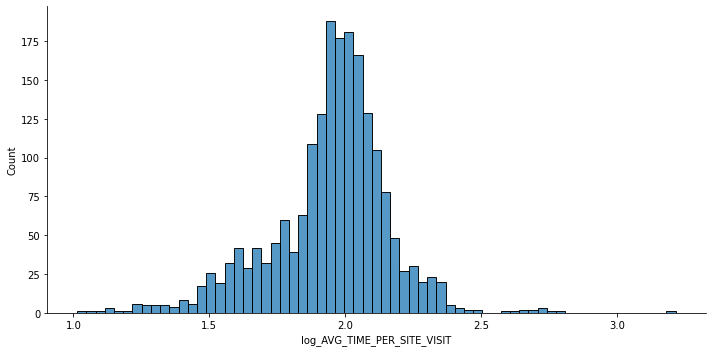

In [13]:
# log transforming and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# developing a histogram using DISPLOT
sns.displot(data   = chef,
            x      = 'log_AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

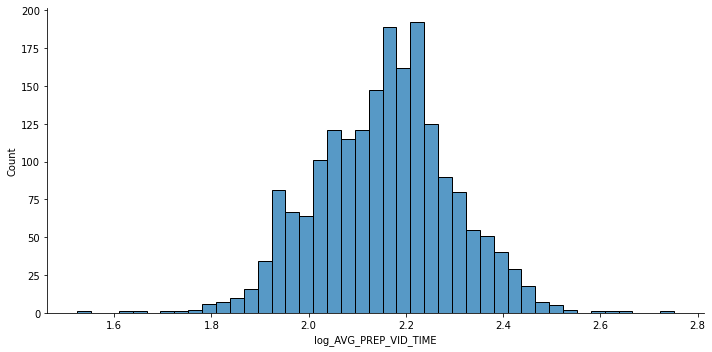

In [14]:
# log transforming and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# developing a histogram using DISPLOT
sns.displot(data   = chef,
            x      = 'log_AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

After applying log transformation, both AVG_TIME_PER_SITE_VISIT and AVG_PREP_VID_TIME variable tend to become more normally distributed compared with the original data.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Analyze how the continuous variables in the dataset correlate to <em>REVENUE</em>.</h4>

In [15]:
# creating a list of continuous features
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME']


# developing a correlation matrix based on continuous features
cont_chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with revenue
cont_chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)


REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

It appears that AVG_PREP_VID_TIME has the strongest correlation with REVENUE.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Create scatter plots between continuous X-variables and REVENUE to inspect Trend-Based Features</h4><br>

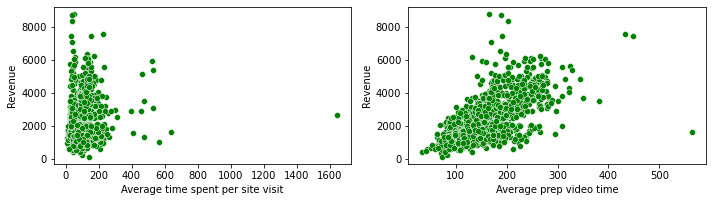

In [16]:
################################
# Visual EDA (Scatterplots)
################################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Average time spent per site visit')
plt.ylabel(ylabel = 'Revenue')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'g')

# adding labels but not adding title
plt.xlabel(xlabel = 'Average prep video time')
plt.ylabel(ylabel = 'Revenue')


# cleaning up the layout and displaying the results
plt.tight_layout()
plt.show()



As shown in the scatter plots, there are no zero values but outliers on the right side of those two variables. Therefore, no flag-based feature engineering needed<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part V: Working with Interval and Count variables</h2><br>
<h4>a) Creating boxplots to visualize relationships between x and y variables and performing log transformation.</h4><br>

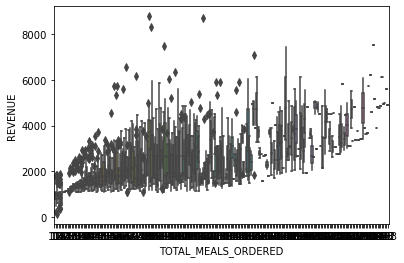

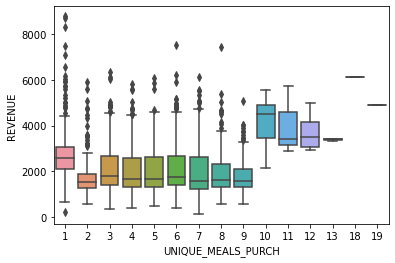

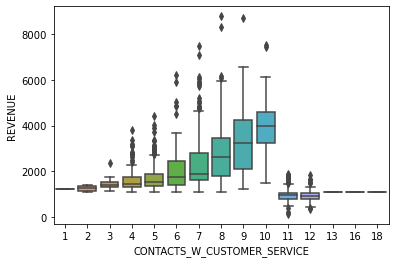

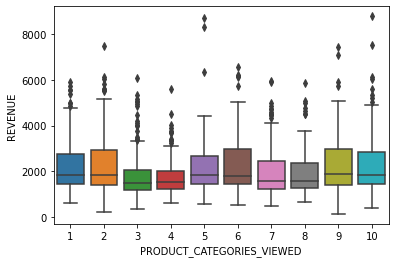

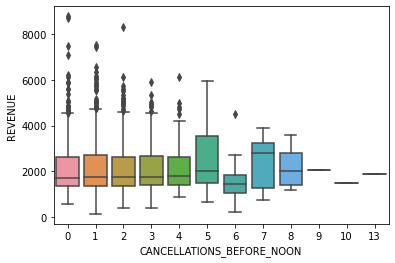

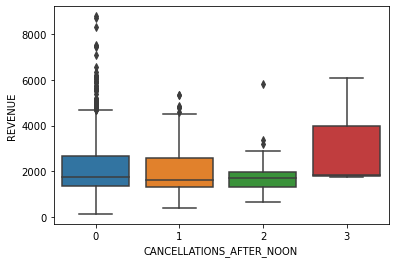

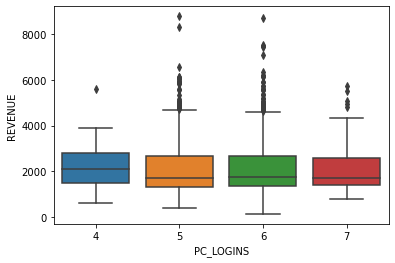

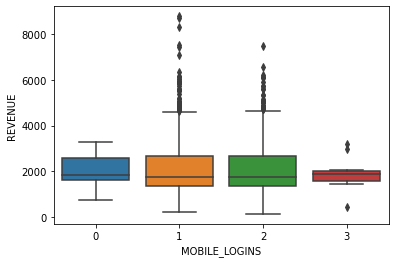

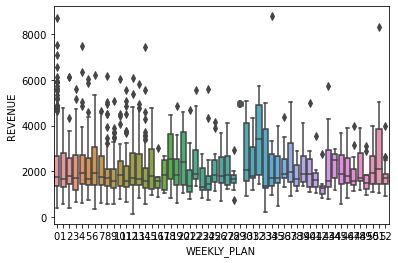

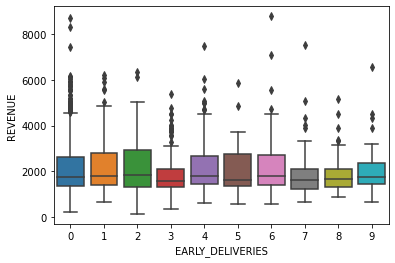

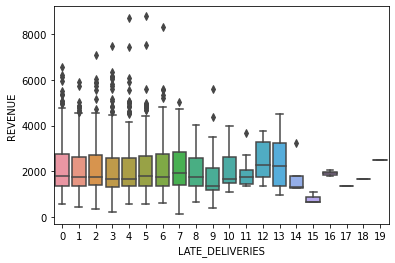

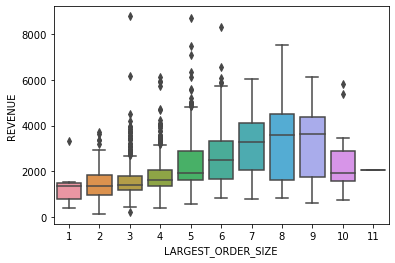

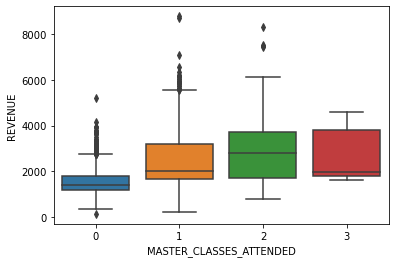

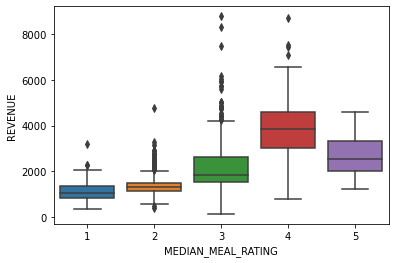

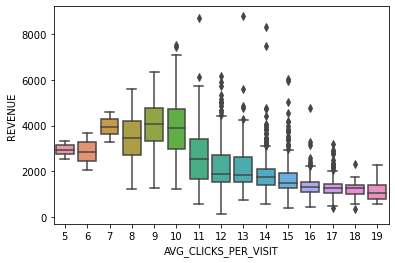

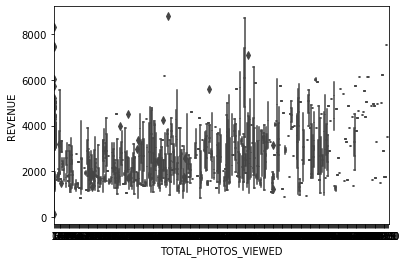

In [17]:
# creating a list of interval/count features
interval_data = ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
              'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
              'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
              'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
              'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


# for loop for creating multiple boxplots
i = 0
for val in interval_data:
    plt.figure(i)
    i = i + 1
    
    # developing a boxplot
    sns.boxplot(x    = val,
                y    = 'REVENUE',
                data = chef)

    # displaying the plot
    plt.show()


In [18]:
# looping to apply log transformation for all interval/count features
for log_val in interval_data:
    # creating columns with log transformed
    chef['log_' + log_val] = np.log10(chef[log_val] + 1) # plus 1 to deal with zero value
    

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Check correlation between x and y variables.</h4>

In [19]:
# check correlation between x and y variables, before and after log transformation
log_corr = chef.loc[ : , ['REVENUE',
                          'log_REVENUE',
                          'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE',
                          'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON',
                          'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                          'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                          'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
                          'log_TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE',
                          'log_PRODUCT_CATEGORIES_VIEWED', 'log_CANCELLATIONS_BEFORE_NOON', 'log_CANCELLATIONS_AFTER_NOON',
                          'log_PC_LOGINS', 'log_MOBILE_LOGINS', 'log_WEEKLY_PLAN', 'log_EARLY_DELIVERIES', 'log_LATE_DELIVERIES',
                          'log_LARGEST_ORDER_SIZE', 'log_MASTER_CLASSES_ATTENDED', 'log_MEDIAN_MEAL_RATING',
                          'log_AVG_CLICKS_PER_VISIT', 'log_TOTAL_PHOTOS_VIEWED']  ].corr(method = 'pearson')\
                                                                                   .round(decimals = 2)

log_corr.loc[ : , ['REVENUE', 'log_REVENUE']   ].sort_values(by = 'log_REVENUE', ascending = False)

,REVENUE,log_REVENUE
log_REVENUE,0.95,1.00
REVENUE,1.00,0.95
log_TOTAL_MEALS_ORDERED,0.61,0.69
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.57,0.63
TOTAL_MEALS_ORDERED,0.60,0.61
log_MASTER_CLASSES_ATTENDED,0.46,0.49
MASTER_CLASSES_ATTENDED,0.45,0.47
LARGEST_ORDER_SIZE,0.44,0.45
log_LARGEST_ORDER_SIZE,0.42,0.45


Based on the correlation above, there are strong correlation variables as follows:
* TOTAL_MEALS_ORDERED
* LARGEST_ORDER_SIZE
* MASTER_CLASSES_ATTENDED
* MEDIAN_MEAL_RATING
* AVG_CLICKS_PER_VISIT
* TOTAL_PHOTOS_VIEWED

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Feature Engineering with Interval and Count variables</h3>

<h4>Cancellations variables</h4>
<h4>a) Printing value counts for Cancellation variables.</h4>

In [20]:
print(f"""
Count of Cancellation
==================

----------
Before Noon
----------
{chef['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}


----------
After Noon
----------
{chef['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}


""")


Count of Cancellation

----------
Before Noon
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64


----------
After Noon
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64





<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Combining Features</strong><br>
<h4>b) Engineer a feature that represents total number of cancellations using the following calculation:</h4>
<br>

Total_Cancel = CANCELLATIONS_BEFORE_NOON + CANCELLATIONS_AFTER_NOON

<br>

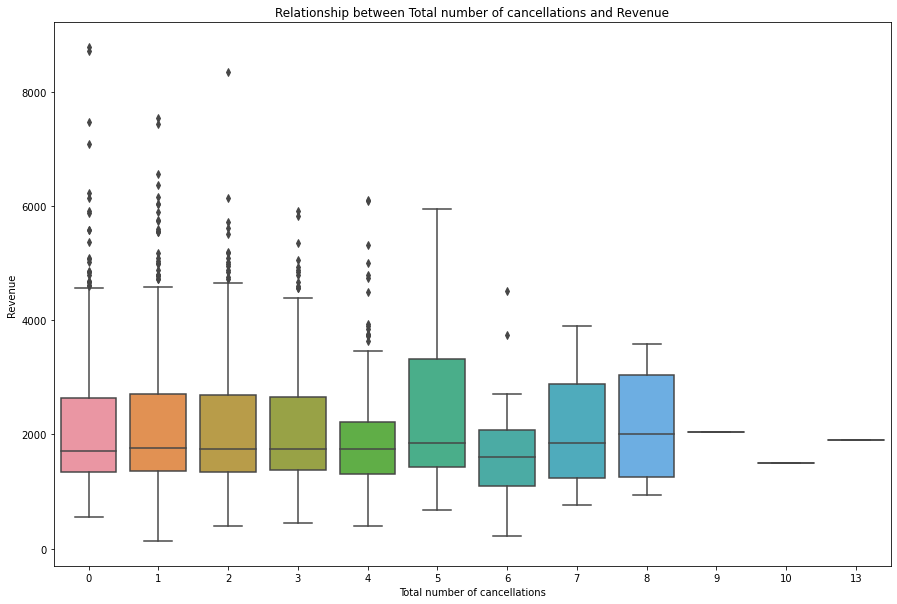


CANCELLATIONS

-----------
Total number of cancellations
-----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: Total_Cancel, dtype: int64


---------------------
Cancellations Correlations
---------------------
CANCELLATIONS_BEFORE_NOON    0.01
CANCELLATIONS_AFTER_NOON    -0.04
Total_Cancel                 0.00
REVENUE                      1.00
Name: REVENUE, dtype: float64




In [21]:
# total number of cancellations
chef['Total_Cancel'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'Total_Cancel',
            y    = 'REVENUE',
            data = chef)



# titles and labels
plt.title(label   = 'Relationship between Total number of cancellations and Revenue')
plt.xlabel(xlabel = 'Total number of cancellations')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
cancel_corr = chef.loc[ : , ['CANCELLATIONS_BEFORE_NOON',
                             'CANCELLATIONS_AFTER_NOON',
                             'Total_Cancel',
                             'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations
print(f"""
CANCELLATIONS
=========

-----------
Total number of cancellations
-----------
{chef['Total_Cancel'].value_counts(normalize = False).sort_index()}


---------------------
Cancellations Correlations
---------------------
{cancel_corr['REVENUE']}

""")

Correlation of new feature is relatively low. Therefore, I performed another engineering method as follows.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Engineer a feature that represents customers who had cancel the orders at least once and who never cancel the orders.</h4>

In [22]:
# create dummy variable 
chef['has_Cancel']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'Total_Cancel'] > 0:
        chef.loc[index, 'has_Cancel'] = 1
        
# checking results
chef[['has_Cancel']].head(5)


,has_Cancel
0,1
1,0
2,1
3,1
4,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Check the correlations of this new feature with revenue.

In [23]:
# developing a small correlation matrix
has_cancel_corr = chef.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
has_cancel_corr.loc['REVENUE',                                   # Y-variable
                   ['has_Cancel']] \
                    .sort_values(ascending = False)

has_Cancel    0.01
Name: REVENUE, dtype: float64

Correlation of this new feature is still relatively low.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>CONTACTS_W_CUSTOMER_SERVICE variables</h4>
<h4>a) Creating boxplots to visualize relationships between x and y variables and analyze whether feature engineering is needed.</h4>

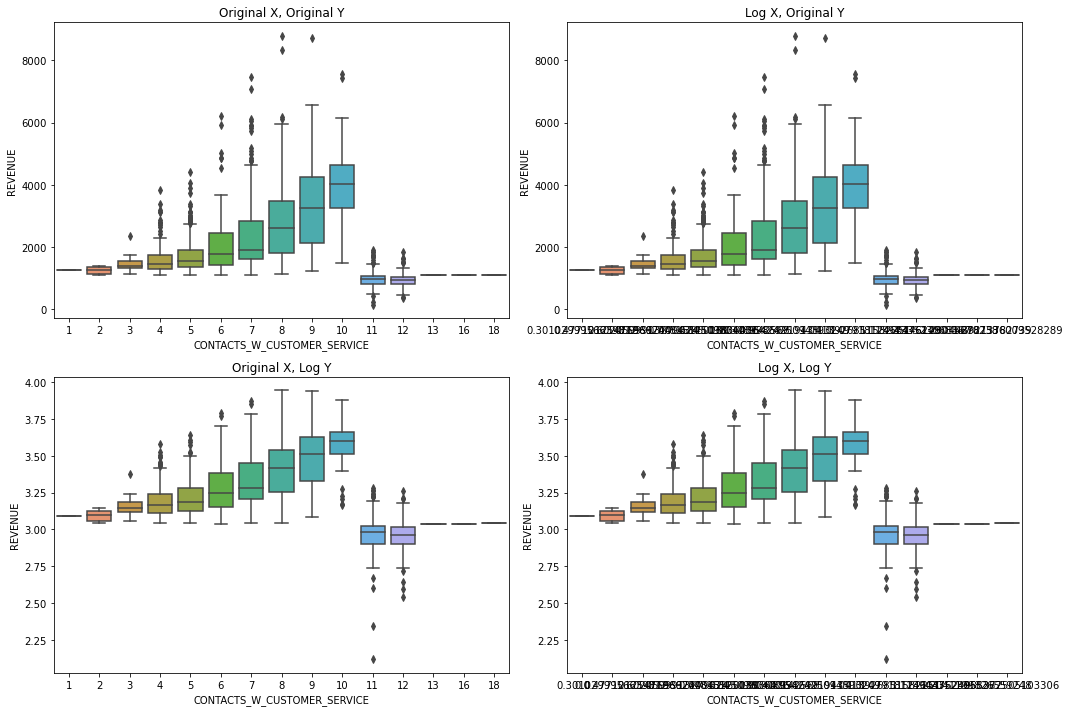

In [24]:
## comparing log transformation results ##

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'log_REVENUE',
            data  = chef)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE']),
            y     = np.log10(chef['REVENUE']),
            data  = chef)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()



As shown in boxplots, no feature engineering needed and log transformed of both x and y variables seem to work well with this relationship.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Count variables with Zeros value</h4>
<h4>a) Use subsetting to check the value counts for all variables that appear to have zero values.  </h4>

In [25]:
# counting the number 
MOBILE_LOGINS_zeros             = len(chef['MOBILE_LOGINS'][chef['MOBILE_LOGINS'] == 0])
WEEKLY_PLAN_zeros               = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0])
EARLY_DELIVERIES_zeros          = len(chef['EARLY_DELIVERIES'][chef['EARLY_DELIVERIES'] == 0])
LATE_DELIVERIES_zeros           = len(chef['LATE_DELIVERIES'][chef['LATE_DELIVERIES'] == 0])
MASTER_CLASSES_ATTENDED_zeros   = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == 0])
TOTAL_PHOTOS_VIEWED_zeros       = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])


# printing a table of the results
print(f"""
                            No\t\tYes
                       ---------------------
Moblie logins         | {MOBILE_LOGINS_zeros }\t\t{len(chef) - MOBILE_LOGINS_zeros }
Weekly plan           | {WEEKLY_PLAN_zeros }\t\t{len(chef) - WEEKLY_PLAN_zeros }
Early deliveries      | {EARLY_DELIVERIES_zeros}\t\t{len(chef) - EARLY_DELIVERIES_zeros }
Late deliveries       | {LATE_DELIVERIES_zeros }\t\t{len(chef) - LATE_DELIVERIES_zeros }
Master class attened  | {MASTER_CLASSES_ATTENDED_zeros }\t\t{len(chef) - MASTER_CLASSES_ATTENDED_zeros }
Total photos viewed   | {TOTAL_PHOTOS_VIEWED_zeros }\t\t{len(chef) - TOTAL_PHOTOS_VIEWED_zeros }

""")


                            No		Yes
                       ---------------------
Moblie logins         | 16		1930
Weekly plan           | 468		1478
Early deliveries      | 1167		779
Late deliveries       | 319		1627
Master class attened  | 932		1014
Total photos viewed   | 1140		806




<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Engineer flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.  </h4>

In [26]:
# create dummy variable 
chef['REG_WEEKLY_PLAN']        = 0
chef['YES_EARLY_DELIVERIES']   = 0
chef['YES_LATE_DELIVERIES']    = 0
chef['ATTEND_MASTER_CLASSES']  = 0
chef['YES_PHOTOS_VIEWED']      = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'REG_WEEKLY_PLAN'] = 1
        
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'YES_EARLY_DELIVERIES'] = 1
        
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'YES_LATE_DELIVERIES'] = 1        

    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'ATTEND_MASTER_CLASSES'] = 1
        
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'YES_PHOTOS_VIEWED'] = 1
        

In [27]:
# developing a small correlation matrix
zeroes_corr = chef.corr().round(decimals = 3)


# checking the correlations of the newly-created variables with revenue
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['REG_WEEKLY_PLAN', 
                'YES_EARLY_DELIVERIES',
                'YES_LATE_DELIVERIES',
                'ATTEND_MASTER_CLASSES',
                'YES_PHOTOS_VIEWED']] \
                .sort_values(ascending = False)

ATTEND_MASTER_CLASSES    0.453
YES_PHOTOS_VIEWED        0.372
YES_EARLY_DELIVERIES     0.013
YES_LATE_DELIVERIES     -0.018
REG_WEEKLY_PLAN         -0.032
Name: REVENUE, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part VI: Working with Categorical and Binary variables</h2>
<h3>EMAIL variable</h3>
<h4>a) Splitting email domain from email addresses</h4>

In [28]:
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Concatenate the email domains as a new column in the dataset.</h4>

In [29]:
# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating email_domain with chef dataset
chef = pd.concat([chef, email_df['email_domain']],
                     axis = 1)


# printing value counts of email_domain
chef.loc[: ,'email_domain'].value_counts()


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
mcdonalds.com        28
merck.com            28
nike.com             27
apple.com            27
dupont.com           26
ibm.com              26
ge.org               26
microsoft.com        25
chevron.com          25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Aggregate the email domains into professional, personal, and junk groups.</h4>

In [30]:
# email domain types
professional_email_domains = ['@mmm.com',
                                '@amex.com',
                                '@apple.com',
                                '@boeing.com',
                                '@caterpillar.com',
                                '@chevron.com',
                                '@cisco.com',
                                '@cocacola.com',
                                '@disney.com',
                                '@dupont.com',
                                '@exxon.com',
                                '@ge.org',
                                '@goldmansacs.com',
                                '@homedepot.com',
                                '@ibm.com',
                                '@intel.com',
                                '@jnj.com',
                                '@jpmorgan.com',
                                '@mcdonalds.com',
                                '@merck.com',
                                '@microsoft.com',
                                '@nike.com',
                                '@pfizer.com',
                                '@pg.com',
                                '@travelers.com',
                                '@unitedtech.com',
                                '@unitedhealth.com',
                                '@verizon.com',
                                '@visa.com',
                                '@walmart.com']
personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']
junk_email_domains  = ['@me.com',
                        '@aol.com',
                        '@hotmail.com',
                        '@live.com',
                        '@msn.com',
                        '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Other variables</h3>
<h4>a) Print the value counts for each variable that was binary.</h4>

In [31]:
# printing columns
print(f"""
Success of the cross-sell promotion
----------
{chef['CROSS_SELL_SUCCESS'].value_counts()}


The registered phone number
----------
{chef['MOBILE_NUMBER'].value_counts()}


Tastes and preferences
----------
{chef['TASTES_AND_PREFERENCES'].value_counts()}


A package locker service 
----------
{chef['PACKAGE_LOCKER'].value_counts()}


A refrigerated compartments in a package locker
----------
{chef['REFRIGERATED_LOCKER'].value_counts()}
""")



Success of the cross-sell promotion
----------
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


The registered phone number
----------
1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64


Tastes and preferences
----------
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64


A package locker service 
----------
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64


A refrigerated compartments in a package locker
----------
0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Develop boxplots on categorical and binary features including:</h4>
    
* CROSS_SELL_SUCCESS
* MOBILE_NUMBER
* TASTES_AND_PREFERENCES
* PACKAGE_LOCKER
* REFRIGERATED_LOCKER
* domain_group

In [32]:
# defining a function for categorical boxplots
def categorical_boxplots(cat_var, response, data):
    fig, ax = plt.subplots(figsize = (6, 4))     # setting figure size
    # developing a scatterplot
    sns.boxplot(x    = cat_var,
                y    = response,
                data = data)
    plt.suptitle("")
    plt.show()

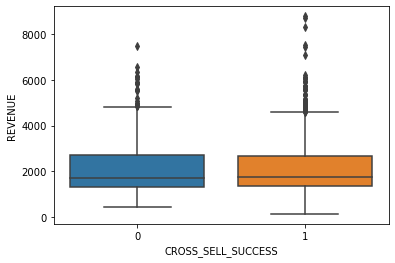

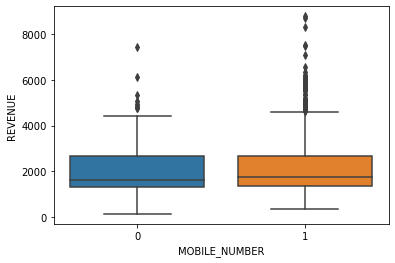

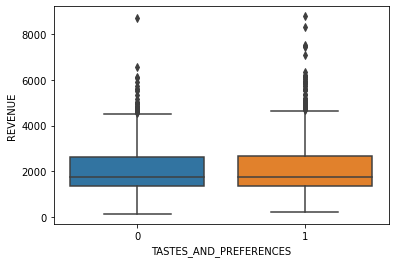

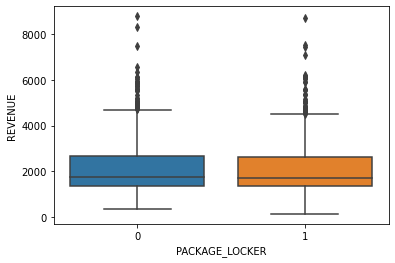

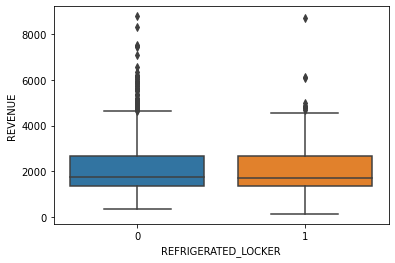

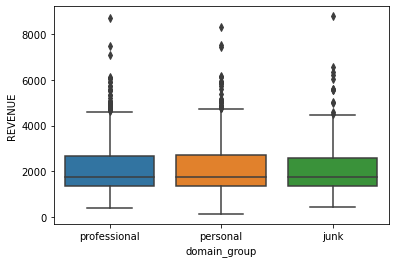

In [33]:
# calling the function for each categorical variable

# CROSS_SELL_SUCCESS
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'CROSS_SELL_SUCCESS',
					 data     = chef)

# MOBILE_NUMBER
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'MOBILE_NUMBER',
					 data     = chef)

# TASTES_AND_PREFERENCES
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'TASTES_AND_PREFERENCES',
					 data     = chef)

# PACKAGE_LOCKER
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'PACKAGE_LOCKER',
					 data     = chef)

# REFRIGERATED_LOCKER
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'REFRIGERATED_LOCKER',
					 data     = chef)

# domain_group
categorical_boxplots(response = 'REVENUE',
					 cat_var  = 'domain_group',
					 data     = chef)

<h4>c) One hot encode domain_group variable using get_dummies.</h4>

In [34]:
# one hot encoding domain_group variables
one_hot_domain_group       = pd.get_dummies(chef['domain_group'])

# dropping categorical variables after they've been encoded
chef = chef.drop('domain_group', axis = 1)


# joining codings together
chef = chef.join([one_hot_domain_group])


# saving new columns
new_columns = chef.columns

# check data
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'log_TOTAL_MEALS_ORDERED', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_CANCELLATIONS_BEFORE_NOON', 'log_CANCELLATIONS_AFTER_NOON', 'log_PC_LOGINS', 'log_MOBILE_LOGINS', 'log_WEEKLY_PLAN', 'log_EARLY_DELIVERIES', 'log_LATE_DELIVERIES', 'log_LARGEST_ORDER_SIZE',
       'log_MA

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<h2>Part VII: Building Predictive Models</h2>
<h4>a) Analyze Pearson correlations with the Y-variable.</h4>

In [35]:
# creating a (Pearson) correlation matrix
chef_corr = chef.corr().round(2)


# printing (Pearson) correlations with REVENUE and log_REVENUE
chef_corr.loc[ : , ['REVENUE', 'log_REVENUE']].sort_values(by = 'log_REVENUE', ascending = False)


,REVENUE,log_REVENUE
log_REVENUE,0.95,1.00
REVENUE,1.00,0.95
log_TOTAL_MEALS_ORDERED,0.61,0.69
log_AVG_PREP_VID_TIME,0.63,0.67
AVG_PREP_VID_TIME,0.64,0.65
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.57,0.63
TOTAL_MEALS_ORDERED,0.60,0.61
log_MASTER_CLASSES_ATTENDED,0.46,0.49
ATTEND_MASTER_CLASSES,0.45,0.48


<h4>b) Printing each explanatory variable in order to be more efficient when building a full model.</h4>

In [36]:
# making a copy of housing
chef_explanatory = chef.copy()


# dropping Y-variables and uncessary features from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['REVENUE','log_REVENUE',
                                          'NAME','EMAIL','FIRST_NAME',
                                          'FAMILY_NAME','email_domain',
                                          'm_FAMILY_NAME'], axis = 1)


# formatting each explanatory variable for statsmodels
for col in chef_explanatory:
    print(col, '+') 

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_CANCELLATIONS_BEFORE_NOON +
log_CANCELLATIONS_AFTER_NOON +
log_PC_LOGINS +
log_MOBILE_LOGINS +
log_WEEKLY_PLAN +
log_EARLY_DELIVERIES +
log_LATE_DELIVERIES +
log_LARGEST_ORDER_SIZE +
log_MASTER_CLASSES_ATTENDED +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
log_TOTAL_PHOTOS_VIEWED +
Total_Cancel +
has_Cancel +
REG_WEEKLY_

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Save the dataset that has been enriched with new features.</h4>

In [37]:
# saving feature-rich dataset in Excel
chef.to_excel('./datasets/chef_feature_rich.xlsx', index = False)

<h4>d) Building a full model with log_REVENUE and all x-variables.</h4>

In [38]:
# blueprinting a model type 
lm_full = smf.ols(formula = """log_REVENUE ~ 
                            CROSS_SELL_SUCCESS +
                            TOTAL_MEALS_ORDERED +
                            UNIQUE_MEALS_PURCH +
                            CONTACTS_W_CUSTOMER_SERVICE +
                            PRODUCT_CATEGORIES_VIEWED +
                            AVG_TIME_PER_SITE_VISIT +
                            MOBILE_NUMBER +
                            CANCELLATIONS_BEFORE_NOON +
                            CANCELLATIONS_AFTER_NOON +
                            TASTES_AND_PREFERENCES +
                            PC_LOGINS +
                            MOBILE_LOGINS +
                            WEEKLY_PLAN +
                            EARLY_DELIVERIES +
                            LATE_DELIVERIES +
                            PACKAGE_LOCKER +
                            REFRIGERATED_LOCKER +
                            AVG_PREP_VID_TIME +
                            LARGEST_ORDER_SIZE +
                            MASTER_CLASSES_ATTENDED +
                            MEDIAN_MEAL_RATING +
                            AVG_CLICKS_PER_VISIT +
                            TOTAL_PHOTOS_VIEWED +
                            log_AVG_TIME_PER_SITE_VISIT +
                            log_AVG_PREP_VID_TIME +
                            log_TOTAL_MEALS_ORDERED +
                            log_UNIQUE_MEALS_PURCH +
                            log_CONTACTS_W_CUSTOMER_SERVICE +
                            log_PRODUCT_CATEGORIES_VIEWED +
                            log_CANCELLATIONS_BEFORE_NOON +
                            log_CANCELLATIONS_AFTER_NOON +
                            log_PC_LOGINS +
                            log_MOBILE_LOGINS +
                            log_WEEKLY_PLAN +
                            log_EARLY_DELIVERIES +
                            log_LATE_DELIVERIES +
                            log_LARGEST_ORDER_SIZE +
                            log_MASTER_CLASSES_ATTENDED +
                            log_MEDIAN_MEAL_RATING +
                            log_AVG_CLICKS_PER_VISIT +
                            log_TOTAL_PHOTOS_VIEWED +
                            Total_Cancel +
                            has_Cancel +
                            REG_WEEKLY_PLAN +
                            YES_EARLY_DELIVERIES +
                            YES_LATE_DELIVERIES +
                            ATTEND_MASTER_CLASSES +
                            YES_PHOTOS_VIEWED +
                            junk +
                            personal +
                            professional """,
                            data = chef)

# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:10:55   Log-Likelihood:                 1699.9
No. Observations:                1946   AIC:                            -3300.
Df Residuals:                    1896   BIC:                            -3021.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.8956      0.405      4.675      0.000       1.100       2.691
CROSS_SELL_SUCCESS                 -0.0165      0.005     -3.046      0.002      -0.027      -0.006
TOTAL_MEALS_ORDERED                -0.0009      0.000     -7.588      0.000      -0.001      -0.001
UNIQUE_MEALS_PURCH                  0.0699      0.004     17.755      0.000       0.062       0.078
CONTACTS_W_CUSTOMER_SERVICE        -0.0037      0.007     -0.522      0.602      -0.017       0.010
PRODUCT_CATEGORIES_VIEWED           0.0132      0.004      3.699      0.000       0.006       0.020
AVG_TIME_PER_SITE_VISIT          2.497e-05   6.39e-05      0.390      0.696      -0.000       0.000
MOBILE_NUMBER                       0.0069      0.007      0.961      0.337      -0.007       0.021
CANCELLATIONS_BEFORE_NOON          -0.0145      0.014     -1.060      0.289      -0.041       0.012
CANCELLATIONS_AFTER_NOON            0.0312      0.027      1.162      0.245      -0.021       0.084
TASTES_AND_PREFERENCES              0.0086      0.005      1.648      0.100      -0.002       0.019
PC_LOGINS                           0.0250      0.073      0.344      0.731      -0.118       0.168
MOBILE_LOGINS                      -0.0568      0.036     -1.570      0.117      -0.128       0.014
WEEKLY_PLAN                     -5.599e-05      0.000     -0.118      0.906      -0.001       0.001
EARLY_DELIVERIES                    0.0041      0.007      0.622      0.534      -0.009       0.017
LATE_DELIVERIES                    -0.0017      0.003     -0.555      0.579      -0.008       0.004
PACKAGE_LOCKER                     -0.0076      0.006     -1.359      0.174      -0.019       0.003
REFRIGERATED_LOCKER                -0.0078      0.008     -0.915      0.360      -0.024       0.009
AVG_PREP_VID_TIME                   0.0008      0.000      3.048      0.002       0.000       0.001
LARGEST_ORDER_SIZE                 -0.0281      0.009     -3.142      0.002      -0.046      -0.011
MASTER_CLASSES_ATTENDED            -0.4456      0.156     -2.850      0.004      -0.752      -0.139
MEDIAN_MEAL_RATING                  0.1608      0.029      5.628      0.000       0.105       0.217
AVG_CLICKS_PER_VISIT                0.0117      0.010      1.159      0.247      -0.008       0.031
TOTAL_PHOTOS_VIEWED             -4.701e-06   3.44e-05     -0.137      0.891   -7.21e-05    6.27e-05
log_AVG_TIME_PER_SITE_VISIT         0.0012      0.019      0.064      0.949      -0.037       0.039
log_AVG_PREP_VID_TIME               0.2889      0.094      3.086      0.002       0.105       0.472
log_TOTAL_MEALS_ORDERED             0.4242      0.026     16.271      0.000       0.373       0.475
log_UNIQUE_MEALS_PURCH             -1.0146      0.049    -20.850      0.000      -1

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>e) Create the best model by diminishing the full model so that it only includes variables that are significant based on their p-values.</h4>

<strong>Goals</strong>
* Maximize adjusted R-square
* All p-values in model < 0.05

In [39]:
# blueprinting a model type 
lm_best = smf.ols(formula = """log_REVENUE ~ 
                                CROSS_SELL_SUCCESS +
                                log_AVG_TIME_PER_SITE_VISIT +
                                log_AVG_PREP_VID_TIME +
                                log_TOTAL_MEALS_ORDERED +
                                log_UNIQUE_MEALS_PURCH +
                                log_CONTACTS_W_CUSTOMER_SERVICE +
                                log_LARGEST_ORDER_SIZE +
                                log_MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                log_TOTAL_PHOTOS_VIEWED +
                                junk +
                                personal +
                                professional """,
                            data = chef)

# telling Python to run the data through the blueprint
results_best = lm_best.fit()


# printing the results
results_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     412.7
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:10:55   Log-Likelihood:                 1495.8
No. Observations:                1946   AIC:                            -2966.
Df Residuals:                    1933   BIC:                            -2893.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.1666      0.046     25.616      0.000       1.077       1.256
CROSS_SELL_SUCCESS                 -0.0130      0.006     -2.260      0.024      -0.024      -0.002
log_AVG_TIME_PER_SITE_VISIT        -0.0365      0.013     -2.824      0.005      -0.062      -0.011
log_AVG_PREP_VID_TIME               0.5854      0.037     15.760      0.000       0.513       0.658
log_TOTAL_MEALS_ORDERED             0.2590      0.011     22.530      0.000       0.236       0.282
log_UNIQUE_MEALS_PURCH             -0.1858      0.013    -14.255      0.000      -0.211      -0.160
log_CONTACTS_W_CUSTOMER_SERVICE     0.1439      0.022      6.602      0.000       0.101       0.187
log_LARGEST_ORDER_SIZE             -0.1898      0.035     -5.394      0.000      -0.259      -0.121
log_MASTER_CLASSES_ATTENDED         0.1132      0.018      6.390      0.000       0.078       0.148
MEDIAN_MEAL_RATING                  0.0651      0.004     14.771      0.000       0.056       0.074
log_TOTAL_PHOTOS_VIEWED             0.0158      0.002      6.315      0.000       0.011       0.021
junk                                0.3851      0.016     24.240      0.000       0.354       0.416
personal                            0.3922      0.015     25.379      0.000       0.362       0.423
professional                        0.3893      0.016     24.795      0.000       0.359       0.420
==============================================================================
Omnibus:                      181.763   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.765
Skew:                          -0.410   Prob(JB):                    2.21e-146
Kurtosis:                       5.757   Cond. No.                     2.44e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<h2>Part VIII: Prepare for Model Development on New Dataset</h2>
<h3>Training and Testing Sets</h3>
<h4>a) Prepare training and testing sets by using train_test_split with a test_size of 0.25 and a random_state of 219.

In [40]:
# preparing explanatory variable data
chef_data = chef_explanatory

# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'log_REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
                                    chef_data,
                                    log_chef_target,  
                                    test_size = 0.25,
                                    random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 51)
y-side: (1459,)


Testing Data
------------
X-side: (487, 51)
y-side: (487,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IX: Model Tournament</h2>
<h3>Ordinary Least Squares Regression</h3>
<h4>a) Apply lm_best model after splitting the dataset to ensure that the p-values are still significant.


In [41]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula = """log_REVENUE ~ 
                                CROSS_SELL_SUCCESS +
                                log_AVG_TIME_PER_SITE_VISIT +
                                log_AVG_PREP_VID_TIME +
                                log_TOTAL_MEALS_ORDERED +
                                log_UNIQUE_MEALS_PURCH +
                                log_CONTACTS_W_CUSTOMER_SERVICE +
                                log_LARGEST_ORDER_SIZE +
                                log_MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                log_TOTAL_PHOTOS_VIEWED 
                                """,
                            data = chef_train)


# Step 2: fit the model based on the data
results = lm_best.fit()


# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     368.1
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:10:55   Log-Likelihood:                 1134.3
No. Observations:                1459   AIC:                            -2247.
Df Residuals:                    1448   BIC:                            -2188.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

After splitting the dataset, all x-variables are still significant.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Declare set of x-variables from the best model

In [42]:
# declaring set of x-variables
x_variables = [                 'CROSS_SELL_SUCCESS' ,
                                'log_AVG_TIME_PER_SITE_VISIT' ,
                                'log_AVG_PREP_VID_TIME' ,
                                'log_TOTAL_MEALS_ORDERED' ,
                                'log_UNIQUE_MEALS_PURCH' ,
                                'log_CONTACTS_W_CUSTOMER_SERVICE',
                                'log_LARGEST_ORDER_SIZE',
                                'log_MASTER_CLASSES_ATTENDED' ,
                                'MEDIAN_MEAL_RATING' ,
                                'log_TOTAL_PHOTOS_VIEWED']



# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_LARGEST_ORDER_SIZE +
log_MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
log_TOTAL_PHOTOS_VIEWED +


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Model Development in scikit-learn</h4>


In [43]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = chef[x_variables]


# preparing response variable
chef_target = chef['log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Develop an OLS regression model in scikit-learn.</h4>

In [44]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square


lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7177
OLS Testing Score  : 0.7209
OLS Train-Test Gap : 0.0032


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>e) Zipping each feature name to its coefficient.</h4>

In [45]:
lr_model_values = zip(chef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.62)
('CROSS_SELL_SUCCESS', -0.02)
('log_AVG_TIME_PER_SITE_VISIT', -0.04)
('log_AVG_PREP_VID_TIME', 0.57)
('log_TOTAL_MEALS_ORDERED', 0.26)
('log_UNIQUE_MEALS_PURCH', -0.2)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.12)
('log_LARGEST_ORDER_SIZE', -0.17)
('log_MASTER_CLASSES_ATTENDED', 0.12)
('MEDIAN_MEAL_RATING', 0.07)
('log_TOTAL_PHOTOS_VIEWED', 0.01)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Lasso regression model</h3>
<h4>a) Develop a lasso regression model.</h4>

In [46]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.5231
Lasso Testing Score  : 0.5565
Lasso Train-Test Gap : 0.0334


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Zipping each feature name to its coefficient.</h4>

In [47]:
lasso_model_values = zip(chef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.0)
('log_AVG_PREP_VID_TIME', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.0)
('log_UNIQUE_MEALS_PURCH', -0.0)
('log_CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('log_PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_CANCELLATIONS_BEFORE_NOON', 0.0)
('log_CANCELLATIONS_AFTER_NOON', -0.0)
('log_PC_LOGINS', 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>c) Dropping coefficients that are equal to zero.</h4>


In [48]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 2.95)
('TOTAL_MEALS_ORDERED', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 0.0)
('MASTER_CLASSES_ATTENDED', 0.0)
('AVG_CLICKS_PER_VISIT', -0.0)
('log_AVG_TIME_PER_SITE_VISIT', -0.0)
('log_TOTAL_MEALS_ORDERED', 0.0)
('log_CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('log_CANCELLATIONS_BEFORE_NOON', 0.0)
('log_PC_LOGINS', -0.0)
('log_WEEKLY_PLAN', -0.0)
('log_LATE_DELIVERIES', -0.0)
('log_MASTER_CLASSES_ATTENDED', 0.0)
('log_AVG_CLICKS_PER_VISIT', -0.0)
('Total_Cancel', -0.0)
('REG_WEEKLY_PLAN', -0.0)
('YES_LATE_DELIVERIES', -0.0)
('YES_PHOTOS_VIEWED', 0.0)
('personal', 0.0)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>ARD model</h3>
<h4>a) Develop a ARD model.</h4>

In [49]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7596
Testing Score : 0.7582
ARD Train-Test Gap : 0.0014


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Zipping each feature name to its coefficient.</h4>

In [50]:
ard_model_values = zip(chef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.94)
('CROSS_SELL_SUCCESS', -0.01183)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.06263)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.00992)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.00996)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.01652)
('MASTER_CLASSES_ATTENDED', 0.0)
('MEDIAN_MEAL_RATING', 0.14246)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_AVG_PREP_VID_TIME', 0.57148)
('log_TOTAL_MEALS_ORDERED', 0.25797)
('log_UNIQUE_MEALS_PURCH', -0.95312)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.0967)
('log_PRODUCT_CATEGORIES_VIEWED', -0.11286)
('log_CANCELLATIONS_BEFORE_NOON', 0.0)
('log_CANCELLATIONS_AFTE

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>c) Dropping coefficients that are equal to zero.</h4>

In [51]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.94)
('CROSS_SELL_SUCCESS', -0.01183)
('UNIQUE_MEALS_PURCH', 0.06263)
('PRODUCT_CATEGORIES_VIEWED', 0.00992)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.00996)
('AVG_PREP_VID_TIME', 0.0)
('LARGEST_ORDER_SIZE', -0.01652)
('MEDIAN_MEAL_RATING', 0.14246)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.57148)
('log_TOTAL_MEALS_ORDERED', 0.25797)
('log_UNIQUE_MEALS_PURCH', -0.95312)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.0967)
('log_PRODUCT_CATEGORIES_VIEWED', -0.11286)
('log_CANCELLATIONS_AFTER_NOON', 0.0)
('log_PC_LOGINS', -0.00146)
('log_WEEKLY_PLAN', 0.0)
('log_LATE_DELIVERIES', 0.0)
('log_MASTER_CLASSES_ATTENDED', 0.1137)
('log_MEDIAN_MEAL_RATING', -0.64129)
('log_AVG_CLICKS_PER_VISIT', -0.00079)
('log_TOTAL_PHOTOS_VIEWED', 0.0224)
('has_Cancel', 0.0)
('REG_WEEKLY_PLAN', -0.00964)
('YES_LATE_DELIVERIES', 0.0)
('YES_PHOTOS_VIEWED', -0.01764)
('personal', 0.0)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>K-Nearest Neighbors and Distance Standardization¶</h3>
<h4>Distance Standardization</h4>
<h4>a) Standardize chef_data</h4>

In [52]:
# declaring set of x-variables for KNN (before log transformation)
x_variables_knn = [                 
                'CROSS_SELL_SUCCESS',
                'TOTAL_MEALS_ORDERED',
                'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE',
                'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT',
                'MOBILE_NUMBER',
                'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON',
                'TASTES_AND_PREFERENCES',
                'PC_LOGINS',
                'MOBILE_LOGINS',
                'WEEKLY_PLAN',
                'EARLY_DELIVERIES',
                'LATE_DELIVERIES',
                'PACKAGE_LOCKER',
                'REFRIGERATED_LOCKER',
                'AVG_PREP_VID_TIME',
                'LARGEST_ORDER_SIZE',
                'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING',
                'AVG_CLICKS_PER_VISIT',
                'TOTAL_PHOTOS_VIEWED',
                'Total_Cancel',
                'has_Cancel',
                'REG_WEEKLY_PLAN',
                'YES_EARLY_DELIVERIES',
                'YES_LATE_DELIVERIES',
                'ATTEND_MASTER_CLASSES',
                'YES_PHOTOS_VIEWED',
                'junk',
                'personal',
                'professional']


chef_data_knn = chef_data[x_variables_knn]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chef_data_knn)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data_knn)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.0,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-0.98,-1.55,-1.78,-0.82,-2.26,-1.04,-0.84,-0.5,-0.89,-0.75
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-0.98,-1.55,0.56,-0.82,0.44,-1.04,-0.84,-0.5,-0.89,-0.75
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,-0.35,0.65,0.56,-0.82,0.44,0.96,-0.84,-0.5,-0.89,-0.75
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.27,0.65,0.56,1.22,0.44,0.96,1.19,-0.5,1.12,1.34
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,7.10,0.65,0.56,1.22,0.44,0.96,1.19,2.0,1.12,1.34


<h4>b) Adding labels to the scaled DataFrame</h4>

In [53]:
X_scaled_df.columns = chef_data_knn.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(chef_data_knn)}


Dataset AFTER Scaling
----------------------
{np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
CROSS_SELL_SUCCESS                 0.218020
TOTAL_MEALS_ORDERED             3057.599946
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
AVG_TIME_PER_SITE_VISIT         3884.497383
MOBILE_NUMBER                      0.107344
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
TASTES_AND_PREFERENCES             0.204082
PC_LOGINS                          0.337105
MOBILE_LOGINS                      0.278218
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
PACKAGE_LOCKER                     0.229000
REFRIGERATED_LOCKER                0.100272
AVG_PREP_VID_TIME               2443.767133
LARGEST_ORDER_SIZE                 2.400232
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT         

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>k-Nearest Neighbors with Non-Standardized Data</h4>
<h4>a) Develop training and testing sets using the non-standardized dataset.</h4>

In [54]:
# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data_knn,
            chef_target,
            test_size = 0.25,
            random_state = 219)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Find the optimal number of neighbors based on test accuracy.</h4><br>

In [55]:
# change neighbors = 51
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 51 neighbors
neighbors_settings = range(1, 51)  # diff


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# finding the optimal number of neighbors
opt_neighbors1 = test_accuracy.index(max(test_accuracy)) + 1 # +1 because human start counting from 1 which is diff than Python (0)
print(f"""The optimal number of neighbors is {opt_neighbors1}""")

The optimal number of neighbors is 12


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Develop a k-Nearest Neighbors model.</h4><br>

In [56]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors1 )


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)


KNN Training Score: 0.6755
KNN Testing Score : 0.664
KNN Train-Test Gap: 0.0115


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>k-Nearest Neighbors with Standardized Data</h4>
<h4>a) Develop training and testing sets using the standardized dataset.</h4>

In [57]:
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Find the optimal number of neighbors based on test accuracy.</h4>

In [58]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 51 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_STAND, y_train_STAND)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_STAND, y_train_STAND))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_STAND, y_test_STAND))



# finding the optimal number of neighbors
opt_neighbors2 = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors2}""")

The optimal number of neighbors is 21


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Develop a KNN algorithm based on the standardized data.</h4>

In [59]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = opt_neighbors2)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.6291
KNN Testing Score : 0.586
KNN Train-Test Gap: 0.0431


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Comparing Results for KNN</h4>


In [60]:
print(f"""
KNN Model             Neighbors     Train Score      Test Score    Train-Test Gap
----------------      ---------     ----------       ----------    --------------
Non-Standardized      {opt_neighbors1}             {knn_reg_score_train}           {knn_reg_score_test}        {knn_reg_test_gap}
Standardized          {opt_neighbors2}             {knn_stand_score_train}           {knn_stand_score_test}        {knn_stand_test_gap}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Standardized'],
           
    
    'Training' : [knn_reg_score_train,
                  
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
               
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                      
                        knn_stand_test_gap],
                   
    
    'Model Size' : ["NA", " NA", " NA"],
                    
    'Model'      : ["NA", "NA", "NA"] }


KNN Model             Neighbors     Train Score      Test Score    Train-Test Gap
----------------      ---------     ----------       ----------    --------------
Non-Standardized      12             0.6755           0.664        0.0115
Standardized          21             0.6291           0.586        0.0431



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Comparing Results</h3>

In [61]:
print(f"""
Model      Train Score      Test Score      Train-Test Gap      Model Size      
-----      -----------      ----------      --------------      ----------      
OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}               {len(lr_model_lst)}        
Lasso      {lasso_train_score}           {lasso_test_score}            {lasso_test_gap}               {len(lasso_model_lst)}     
ARD        {ard_train_score}           {ard_test_score}            {ard_test_gap}               {len(ard_model_lst)}       
KNN        {knn_stand_score_train}           {knn_stand_score_test}             {knn_stand_test_gap}               NA
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD','KNN'],
           
    'Training' : [lr_train_score, lasso_train_score,
                 ard_train_score, knn_stand_score_train],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                  ard_test_score, knn_stand_score_test],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                       ard_test_gap, knn_stand_test_gap ],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                    len(ard_model_lst), 'NA'],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst, 'NA']}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/linear_model_performance.xlsx', index = False)


Model      Train Score      Test Score      Train-Test Gap      Model Size      
-----      -----------      ----------      --------------      ----------      
OLS        0.7177           0.7209            0.0032               11        
Lasso      0.5231           0.5565            0.0334               26     
ARD        0.7596           0.7582            0.0014               32       
KNN        0.6291           0.586             0.0431               NA



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Final Model</h3>

In [62]:
print(f"""
Model      Train Score      Test Score      Train-Test Gap      Model Size      
-----      -----------      ----------      --------------      ----------          
OLS        {lr_train_score}           {lr_test_score}            {lr_test_gap}               {len(lr_model_lst)}       



Model variables and coefficients
---------------------------------
""")

lr_model_lst_df = pd.DataFrame(lr_model_lst)
lr_model_lst_df.columns = ['Variables', 'Coefficients']
lr_model_lst_df




Model      Train Score      Test Score      Train-Test Gap      Model Size      
-----      -----------      ----------      --------------      ----------          
OLS        0.7177           0.7209            0.0032               11       



Model variables and coefficients
---------------------------------



,Variables,Coefficients
0,intercept,1.62
1,CROSS_SELL_SUCCESS,-0.02
2,log_AVG_TIME_PER_SITE_VISIT,-0.04
3,log_AVG_PREP_VID_TIME,0.57
4,log_TOTAL_MEALS_ORDERED,0.26
5,log_UNIQUE_MEALS_PURCH,-0.20
6,log_CONTACTS_W_CUSTOMER_SERVICE,0.12
7,log_LARGEST_ORDER_SIZE,-0.17
8,log_MASTER_CLASSES_ATTENDED,0.12
9,MEDIAN_MEAL_RATING,0.07


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>